# Snar Benchmark
## Imports

In [1]:
import json
import os
import pathlib
import sys
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


#pypath = os.path.join(str(pathlib.Path.cwd().parent.parent),"app","lib")

#sys.path.append(pypath)

from everest.study import PoolStudy
from everest.benchmarks.multiobjective import SnarBenchmark
from everest.strategies.strategy import RandomStrategy
from everest.strategies.botorch.sobo import BoTorchSoboStrategy
from everest.strategies.botorch.qehvi import BoTorchQnehviStrategy, BoTorchQehviStrategy
from everest.domain.features import InputFeature

from everest.benchmarks.visualization import plot_optimization_history, plot_pooloptimization_history
from everest.api import datascience


__init__.py run


In [2]:
snar = SnarBenchmark()
snar.domain.get_feature_reps_df()

,Type,Description
conc_dfnb,ContinuousInputFeature,"[0.1,0.5]"
equiv_pldn,ContinuousInputFeature,"[1.0,5.0]"
tau,ContinuousInputFeature,"[0.5,2.0]"
temperature,ContinuousInputFeature,"[30.0,120.0]"
e_factor,ContinuousOutputFeature,MinIdentityDesirabilityFunction
sty,ContinuousOutputFeature,MaxIdentityDesirabilityFunction


## Run strategies

In [12]:
num_optimizations = 1
num_iterations = 60
batch_size = 1

### Random Strategy

In [10]:
random_studies = []
for i in range(num_optimizations):
    study = SnarBenchmark()
    study.optimize(RandomStrategy(use_sobol=False), batch_size=batch_size, num_iterations=num_iterations)
    random_studies.append(study)

100%|██████████| 60/60 [00:01<00:00, 32.40it/s, fbest=3.37e+3]


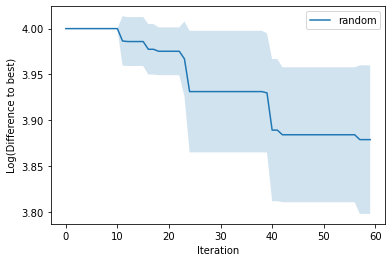

In [11]:
#ax = plot_optimization_history(bo_studies,error_bar=True, log_scale=True, label = "qEI")
ax = plot_optimization_history(random_studies,error_bar=True, log_scale=True, label = "random", best_possible_f=random_studies[0].best_possible_hypervolume,)
ax.legend()
plt.show()

### QNEHVI

In [13]:
bo_studies = []

for i in range(num_optimizations):
    study = SnarBenchmark()
    #study.optimize(BoTorchQnehviStrategy(ref_point=study.ref_point,categorical_encoding="ONE_HOT",categorical_method="EXHAUSTIVE"),num_iterations=50)
    study.optimize(BoTorchQehviStrategy(ref_point=study.ref_point,categorical_encoding="ONE_HOT",categorical_method="EXHAUSTIVE"),num_iterations=num_iterations)
    bo_studies.append(study)

100%|██████████| 60/60 [21:25<00:00, 21.43s/it, fbest=9.6e+3] 


9603.11690522561


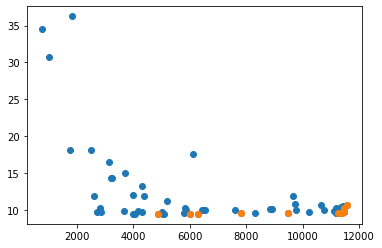

In [14]:
from everest.utils.multiobjective import compute_hypervolume, get_pareto_front

study = bo_studies[0]


optimal_experiments = get_pareto_front(study.domain,study.experiments)
print(compute_hypervolume(study.domain, optimal_experiments, study.ref_point))


fig, ax = plt.subplots()
ax.scatter(study.experiments.sty,study.experiments.e_factor)
ax.scatter(optimal_experiments.sty,optimal_experiments.e_factor)
plt.show()